In [1]:
# import all packages required
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
import statsmodels.api as sm
from sklearn.compose import make_column_transformer

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from imblearn.over_sampling import SMOTE

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#load data
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


# Specify the full path to the CSV file
path = ('/content/diabetes_binary_health_indicators_BRFSS2015.csv')

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(path)



ModuleNotFoundError: No module named 'google'

In [13]:
data = pd.read_csv("C:\All in One\Applied Machine Learning\diabetic ML project\diabetes_Dataset\diabetes_binary_health_indicators_BRFSS2015.csv")

In [14]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [16]:
data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [29]:
#check for missing data
missing_count = data.isnull().sum()
print (missing_count)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [17]:
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


<Axes: >

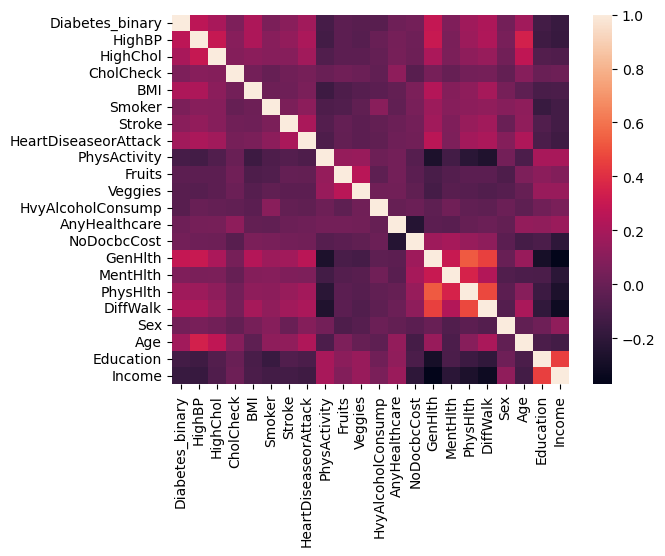

In [20]:
sns.heatmap(data.corr())

In [22]:
# start with splitting the data into target and features
X = data.drop(['Diabetes_binary'], axis = 1)
y = data['Diabetes_binary']

print(X.shape)
print(y.shape)

(253680, 21)
(253680,)


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >, <Axes: >,


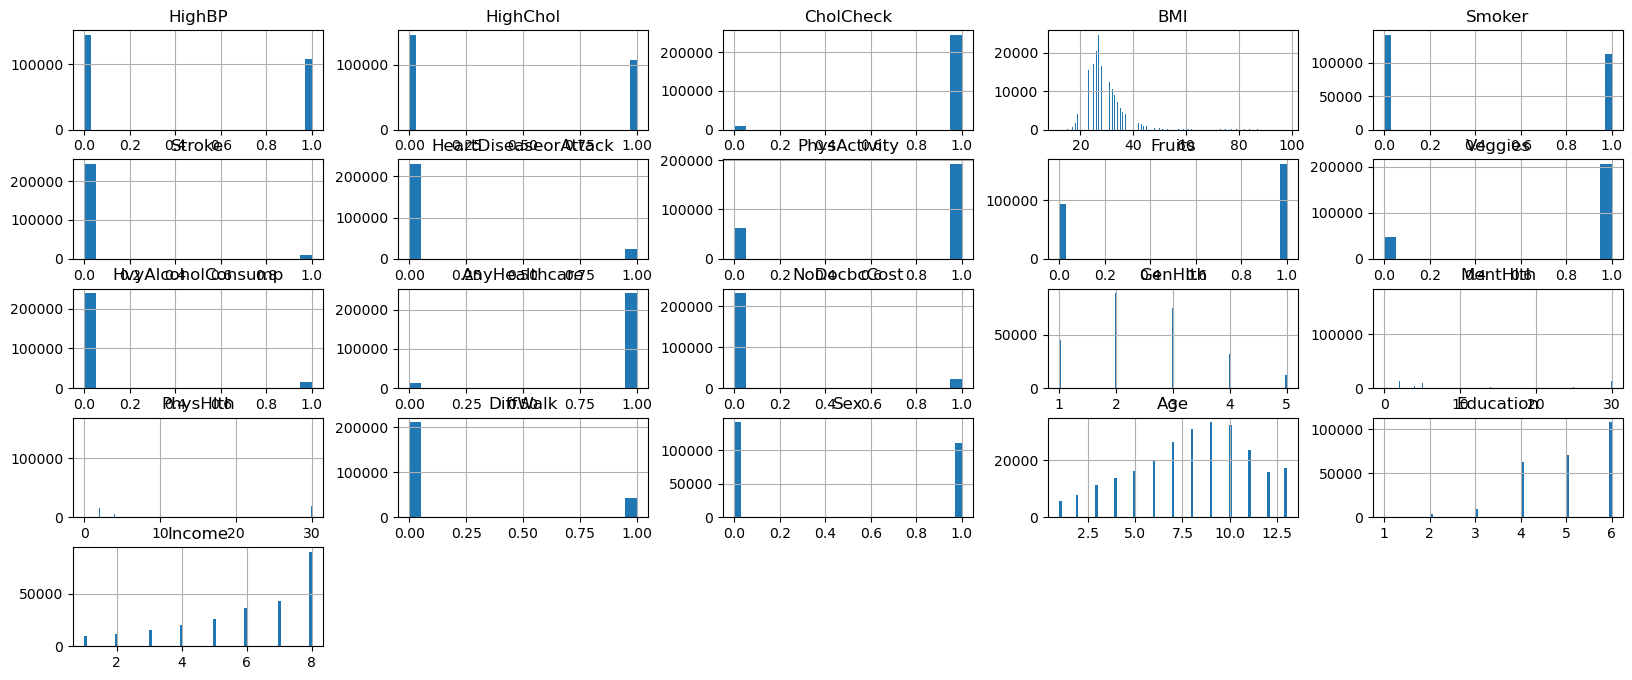

In [33]:
X.hist(bins ='auto', figsize=(20,8))

<Axes: >

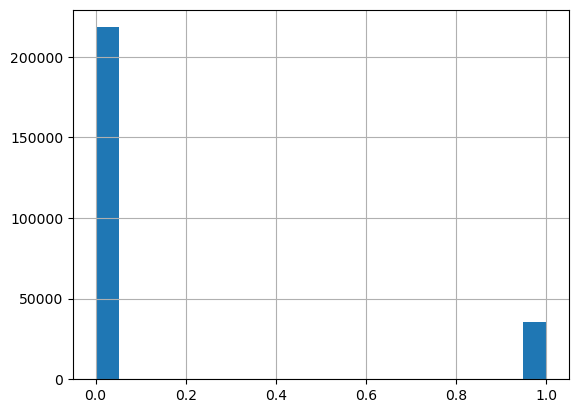

In [31]:
y.hist(bins= 'auto')

In [41]:
continuous_features = ['BMI']

categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# Split Dataset

In [42]:
X = data.drop(['Diabetes_binary'], axis = 1)
y = data['Diabetes_binary']

#split for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
print(X.shape)
print(y.shape)

(253680, 21)
(253680,)


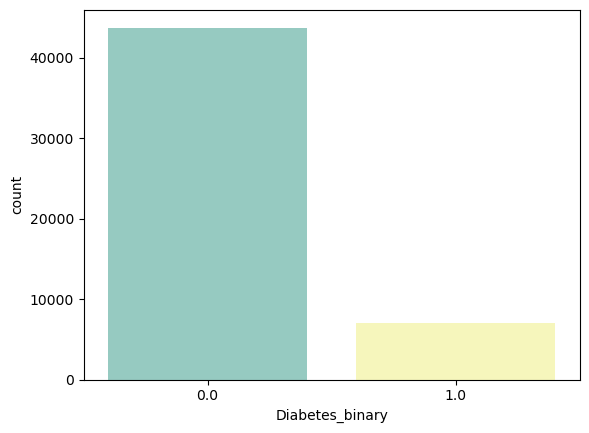

In [44]:
ax = sns.countplot(x = y_test, palette = 'Set3')

# Preprocess and Model

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

In [79]:
#model
# Create the logistic regression model
lr = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)

In [80]:
# create pipeline
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('logisticregression', lr)
])

In [81]:
param_grid = {
    'logisticregression__solver': ['lbfgs', 'newton-cholesky'],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
}
grid_search = GridSearchCV(pipe_lr, param_grid, cv= 5)

In [82]:
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['BMI']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['HighBP',
                                                                          'HighChol',
                                                                          'CholCheck',
                                                                          'BMI',
                                                                          'Smoker',
                                                                          'Stroke',
                                                                          'HeartDiseaseorAttack',
                                                                          'PhysActivity',
                                                                          'Fruits',
                                                                          'Veggies',
                                                                          'HvyAlcoholConsump',
                                                                          'AnyHealthcare',
                                                                          'NoDocbcCost',
                                                                          'GenHlth',
                                                                          'MentHlth',
                                                                          'PhysHlth',
                                                                          'DiffWalk',
                                                                          'Sex',
                                                                          'Age',
                                                                          'Education',
                                                                          'Income'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                         'logisticregression__solver': ['lbfgs',
                                                        'newton-cholesky']})

In [87]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}


In [89]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_
# Now you can use the best_model for predictions and evaluation
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [90]:
# Print the accuracy on the training and test datasets
print('Train dataset  Accuracy:', best_model.score(X_train, y_train))
print('test dataset Accuracy:', best_model.score(X_test, y_test))


# Print the classification report for the test dataset

print(classification_report(y_test, y_pred_test))

Train dataset  Accuracy: 0.8657117234310943
test dataset Accuracy: 0.8676679280983917
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.18      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736



In [91]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate prediction (use probability prediction)
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC_AUC score on test data using probability predictions
roc_auc_test = roc_auc_score(y_test, y_prob)
print(f"ROC_AUC of Test Data: {roc_auc_test:.3f}")

ROC_AUC of Test Data: 0.832


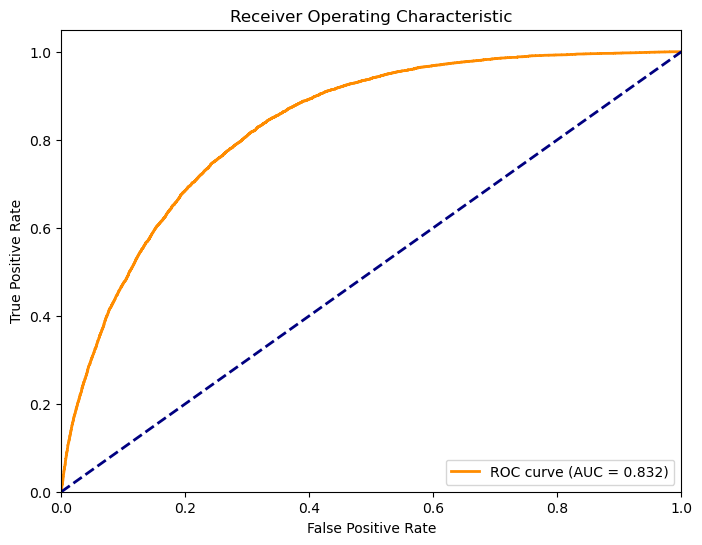

In [92]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# SHAP

In [105]:
#!pip install shap

In [94]:
import shap

PermutationExplainer explainer: 50737it [1:35:04,  8.88it/s]                             


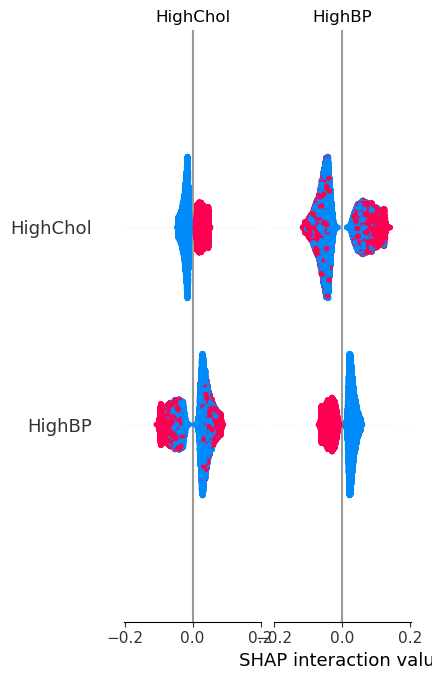

IndexError: tuple index out of range

In [112]:
# Get the preprocessor and logistic regression model from the pipeline
preprocessor = best_model.named_steps['preprocessor']
logistic_regression_model = best_model.named_steps['logisticregression']

# Create a callable function that applies preprocessing and then predicts
def predict_proba_with_preprocessing(X):
    preprocessed_X = preprocessor.transform(X)
    return logistic_regression_model.predict_proba(preprocessed_X)

# Create a SHAP explainer for the model
explainer = shap.Explainer(predict_proba_with_preprocessing, X_train)

# Calculate SHAP values for a subset of data (e.g., X_test)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# To explain an individual prediction for a specific sample, for example, the first sample in X_test
sample_index = 0
shap_values_single = explainer.shap_values(X_test.iloc[sample_index])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_single[1], X_test.iloc[sample_index])

# If you want to calculate the overall feature importance scores, you can use the absolute mean SHAP values
feature_importance = np.abs(shap_values).mean(axis=0)

# Print feature importances
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.3f}")


In [118]:
# To explain an individual prediction for a specific sample, for example, the first sample in X_test
sample_index = 0
shap_values_single = explainer.shap_values(X_test.iloc[sample_index])
class_index = 1  # Assuming you are interested in the positive class (index 1)

# Ensure that shap_values_single is a single array, not a tuple
if isinstance(shap_values_single, tuple):
    shap_values_single = shap_values_single[class_index]

shap.initjs()
shap.force_plot(explainer.expected_value[class_index], shap_values_single, X_test.iloc[sample_index])


IndexError: tuple index out of range

In [117]:
#!pip install --upgrade shap


In [ ]:
# If you want to calculate the overall feature importance scores, you can use the absolute mean SHAP values
feature_importance = np.abs(shap_values).mean(axis=0)

# Print feature importances
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.3f}")